In [13]:
from sotodlib import core
import numpy as np
import so3g
from scipy.optimize import curve_fit
import ephem
from datetime import datetime
from so3g.proj import coords, quat
from astropy.table import Table
import re, os, pickle
import matplotlib.pyplot as plt



In [14]:
def gaussian2d(xieta, a, xi0, eta0, fwhm_xi, fwhm_eta, phi):
    xi, eta = xieta
    xi_rot = xi*np.cos(phi) - eta*np.sin(phi)
    eta_rot = xi*np.sin(phi) + eta*np.cos(phi)
    factor = 2*np.sqrt(2*np.log(2))
    xi_coef = -0.5 * (xi_rot-xi0)**2/(fwhm_xi/factor)**2
    eta_coef = -0.5 * (eta_rot-eta0)**2/(fwhm_eta/factor)**2
    return(a*np.exp(xi_coef+eta_coef))


Starting SAT Beams


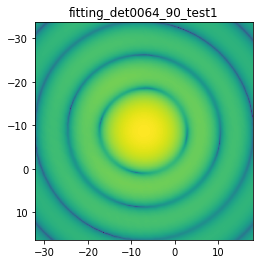

770.726
(array([500]), array([499]))
[[ 0.28518933  0.27773014  0.2715936  ...,  0.34054178  0.34412417
   0.34756872]
 [ 0.2777417   0.27024236  0.26273671 ...,  0.33469751  0.34047222
   0.3440541 ]
 [ 0.27029541  0.26276261  0.25522906 ...,  0.33090842  0.33669534
   0.34041199]
 ..., 
 [ 0.34258869  0.33872679  0.3347272  ...,  0.31618789  0.32179976
   0.3273029 ]
 [ 0.34630948  0.34257928  0.33870986 ...,  0.3217828   0.32730615
   0.33271673]
 [ 0.34989697  0.34630021  0.342563   ...,  0.32728142  0.3327117
   0.33802509]]


In [26]:
print("Starting SAT Beams")
name = 'fitting_det0064_90_test1'
path = '/home/jorlo/dev/gaussian_beams/'
sat_beam = pickle.load(open(path + name + '.pkl', 'rb'), encoding = 'bytes')

data = sat_beam[b'data']

plt.imshow(np.log(data), extent = [-32.12481, 17.87519,  16.29601, -33.70399])
plt.title(name)
plt.savefig(name + "_beam.pdf")
plt.show()

print(np.amax(data))
print(np.where(data==np.amax(data)))
print(data)